# **Batalla Naval en Python**

## **Análisis** (entradas, salidas, funciones y restricciones)

### Entradas
- Coordenadas de los 3 barcos del jugador humano (pares (fila, columna) dentro de un tablero 5x5).
- Coordenadas de ataque del jugador humano (pares (fila, columna)).
- Generación aleatoria de: ``Los 3 barcos de la máquina.``, ``Los ataques de la máquina.``

### Salidas
- Estado de los tableros después de cada turno (jugador y máquina).
- Mensajes indicando si un ataque fue acierto o fallo.
- Declaración del ganador cuando uno de los jugadores pierda los 3 barcos.
- Tableros finales con barcos hundidos y posiciones atacadas.

### Restricciones
- Tablero de tamaño 5x5.
- Cada jugador tiene exactamente 3 barcos.
- Cada barco ocupa una sola celda.
- No se deben mostrar los barcos de la máquina hasta el final.
- Se debe permitir solo coordenadas válidas (0 <= fila, columna <= 4).

### Funciones necesarias
- crear_tablero(): Inicializa un tablero vacío.

- colocar_barcos(tablero, n, aleatorio=True): Coloca n barcos en el tablero, ya sea aleatoriamente (máquina) o manualmente (jugador).
- mostrar_tablero(tablero, ocultar_barcos=False): Muestra el tablero en consola.
- ataque(tablero, fila, col): Procesa un ataque y devuelve si fue éxito o fallo.
- turno_jugador(): Pide al jugador humano una coordenada de ataque.
- turno_maquina(): Genera un ataque aleatorio válido para la máquina.
- juego(): Bucle principal del juego hasta que alguien gane.

```pseudocode
INICIO
    tablero_jugador = crear_tablero()
    tablero_maquina = crear_tablero()
    
    colocar_barcos(tablero_jugador, 3, aleatorio=False)
    colocar_barcos(tablero_maquina, 3, aleatorio=True)

    MIENTRAS jugador y máquina tengan barcos vivos:
        mostrar_tablero(tablero_jugador)
        
        coordenada = pedir ataque jugador
        resultado = ataque(tablero_maquina, coordenada)
        mostrar resultado

        SI maquina no tiene barcos:
            GANADOR = jugador
            salir bucle

        coordenadaM = ataque aleatorio máquina
        resultado = ataque(tablero_jugador, coordenadaM)
        mostrar resultado

        SI jugador no tiene barcos:
            GANADOR = máquina
            salir bucle

    mostrar_tablero_final(tablero_jugador, tablero_maquina)
    imprimir GANADOR
FIN


## Flujograma
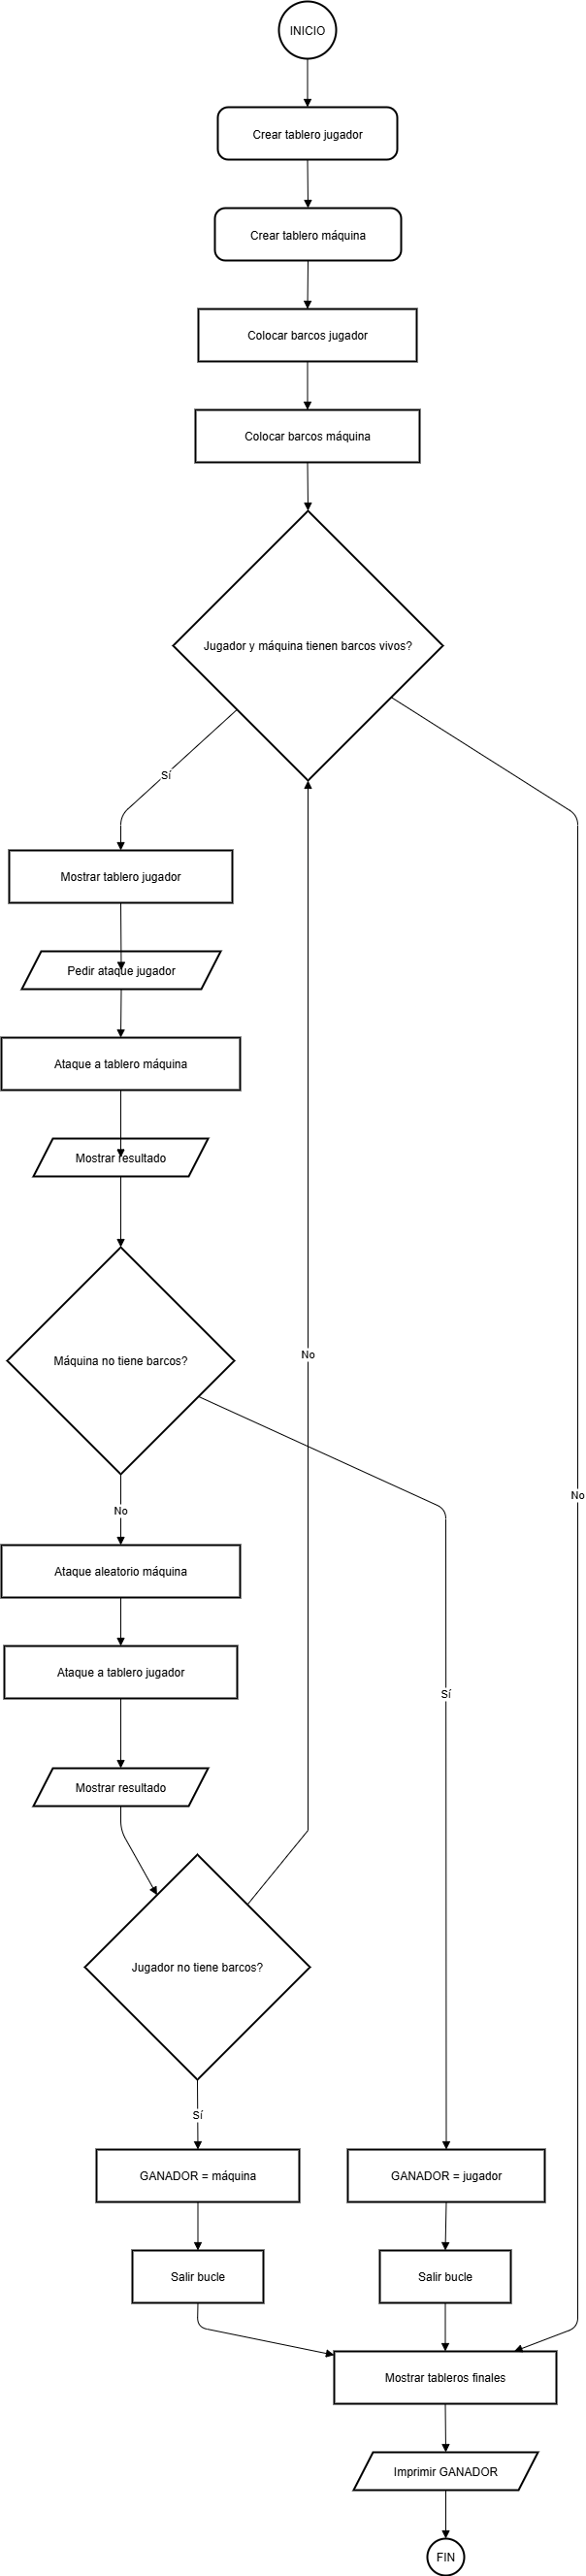

## Script

In [ ]:
import os
import random

# Constantes
TAM = 5
BARCOS = 3

def crear_tablero():
    """Crea un tablero vacío 5x5"""
    return [["~"] * TAM for _ in range(TAM)]

def mostrar_tablero(tablero, ocultar_barcos=False):
    """Muestra el tablero en consola"""
    print("  0 1 2 3 4") 
    print("  ---------")

    for i, fila in enumerate(tablero):
        linea = ""
        for celda in fila:
            if ocultar_barcos and celda == "B":
                linea += "~ "
            else:
                linea += celda + " "
        print(f"{i}|{linea}")
    print()

def colocar_barcos(tablero, n, aleatorio=True):
    """Coloca n barcos en el tablero"""
    barcos_colocados = 0
    while barcos_colocados < n:
        if aleatorio:
            fila, col = random.randint(0, TAM-1), random.randint(0, TAM-1)
        else:
            try:
                print(f"Ingrese coordenadas del barco {barcos_colocados+1}")
                fila = int(input(f"Fila (0-{TAM-1}): "))
                col = int(input(f"Columna (0-{TAM-1}): "))
            except ValueError:
                print("Entrada inválida, debes poner un número.")
                continue

            # Validar rango
            if not (0 <= fila < TAM and 0 <= col < TAM):
                print("Coordenadas fuera de rango, intenta nuevamente.")
                continue

        if tablero[fila][col] == "~":
            tablero[fila][col] = "B"
            barcos_colocados += 1
        else:
            if not aleatorio:
                print("Ya hay un barco en esa posición, intenta nuevamente.")

def ataque(tablero, fila, col):
    """Procesa un ataque y devuelve True, False, o None"""
    if tablero[fila][col] == "O" or tablero[fila][col] == "X":
        return None  # Casilla ya atacada
    elif tablero[fila][col] == "B":
        tablero[fila][col] = "X"  # Barco hundido
        return True
    elif tablero[fila][col] == "~":
        tablero[fila][col] = "O" # Agua
        return False

def contar_barcos_vivos(tablero):
    """Cuenta los barcos que no han sido impactados"""
    return sum(fila.count("B") for fila in tablero)

def juego():
    print("Batalla Naval en Python\n")
    tablero_jugador = crear_tablero()
    tablero_maquina = crear_tablero()

    print("Coloca tus barcos:")
    colocar_barcos(tablero_jugador, BARCOS, aleatorio=False)

    print("\nLa máquina coloca sus barcos...")
    colocar_barcos(tablero_maquina, BARCOS, aleatorio=True)

    ganador = None

    while contar_barcos_vivos(tablero_jugador) > 0 and contar_barcos_vivos(tablero_maquina) > 0:
        print("\nTABLERO DEL JUGADOR")
        mostrar_tablero(tablero_jugador)

        print("TABLERO DE ATAQUES (Máquina)")
        mostrar_tablero(tablero_maquina, ocultar_barcos=True)

        # Turno jugador
        print("Tu turno: ¡elige una casilla para atacar!\n")
        try:
            fila = int(input(f"Fila (0-{TAM-1}): "))
            col = int(input(f"Columna (0-{TAM-1}): "))
        except ValueError:
            print("Entrada inválida, turno perdido.")
            continue

        if not (0 <= fila < TAM and 0 <= col < TAM):
            print("Coordenadas fuera de rango, turno perdido.")
            continue

        resultado_ataque = ataque(tablero_maquina, fila, col)
        if resultado_ataque is True:
            print("¡Acertaste!")
        elif resultado_ataque is False:
            print("Fallaste")
        elif resultado_ataque is None:
            print("Ya has atacado esas coordenadas. Pierdes el turno.")
            continue
    
        if contar_barcos_vivos(tablero_maquina) == 0:
            ganador = "Jugador"
            break
    
        # Turno máquina
        print("\nTurno de la máquina...")
        filaM, colM = random.randint(0, TAM-1), random.randint(0, TAM-1)

        if ataque(tablero_jugador, filaM, colM):
            print(f"La máquina acertó en ({filaM}, {colM})")
        else:
            print(f"La máquina falló en ({filaM}, {colM})")

        if contar_barcos_vivos(tablero_jugador) == 0:
            ganador = "Máquina"
            break
    
    print("\nTABLEROS FINALES ")
    print("Tablero Jugador:")
    mostrar_tablero(tablero_jugador)
    print("Tablero Máquina:")
    mostrar_tablero(tablero_maquina)

    print(f"\nEl ganador es: {ganador}")

if __name__ == "__main__":
    juego()

Batalla Naval en Python

Coloca tus barcos:
Ingrese coordenadas del barco 1
Coordenadas fuera de rango, intenta nuevamente.
Ingrese coordenadas del barco 1
Ingrese coordenadas del barco 2
Ingrese coordenadas del barco 3

La máquina coloca sus barcos...

TABLERO DEL JUGADOR
~ ~ ~ ~ ~ 
~ ~ ~ ~ B 
~ ~ B ~ ~ 
~ ~ ~ B ~ 
~ ~ ~ ~ ~ 


ATAQUES DEL JUGADOR
~ ~ ~ ~ ~ 
~ ~ ~ ~ ~ 
~ ~ ~ ~ ~ 
~ ~ ~ ~ ~ 
~ ~ ~ ~ ~ 

Fallaste

Turno de la máquina...
La máquina falló en (0, 4)

TABLERO DEL JUGADOR
~ ~ ~ ~ O 
~ ~ ~ ~ B 
~ ~ B ~ ~ 
~ ~ ~ B ~ 
~ ~ ~ ~ ~ 


ATAQUES DEL JUGADOR
~ ~ ~ ~ ~ 
~ O ~ ~ ~ 
~ ~ ~ ~ ~ 
~ ~ ~ ~ ~ 
~ ~ ~ ~ ~ 

Entrada inválida, turno perdido.

TABLERO DEL JUGADOR
~ ~ ~ ~ O 
~ ~ ~ ~ B 
~ ~ B ~ ~ 
~ ~ ~ B ~ 
~ ~ ~ ~ ~ 


ATAQUES DEL JUGADOR
~ ~ ~ ~ ~ 
~ O ~ ~ ~ 
~ ~ ~ ~ ~ 
~ ~ ~ ~ ~ 
~ ~ ~ ~ ~ 

Entrada inválida, turno perdido.

TABLERO DEL JUGADOR
~ ~ ~ ~ O 
~ ~ ~ ~ B 
~ ~ B ~ ~ 
~ ~ ~ B ~ 
~ ~ ~ ~ ~ 


ATAQUES DEL JUGADOR
~ ~ ~ ~ ~ 
~ O ~ ~ ~ 
~ ~ ~ ~ ~ 
~ ~ ~ ~ ~ 
~ ~ ~ ~ ~ 

Entra